In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

ImportError: cannot import name 'clip_to_image_size' from 'keras.src.layers.preprocessing.image_preprocessing.bounding_boxes.converters' (C:\Users\Jaydeep\anaconda3\Lib\site-packages\keras\src\layers\preprocessing\image_preprocessing\bounding_boxes\converters.py)

In [6]:
red = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')
white = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=';')

red['type'] = 1
white['type'] = 0

wines = pd.concat([red, white], ignore_index=True)
wines.dropna(inplace=True)

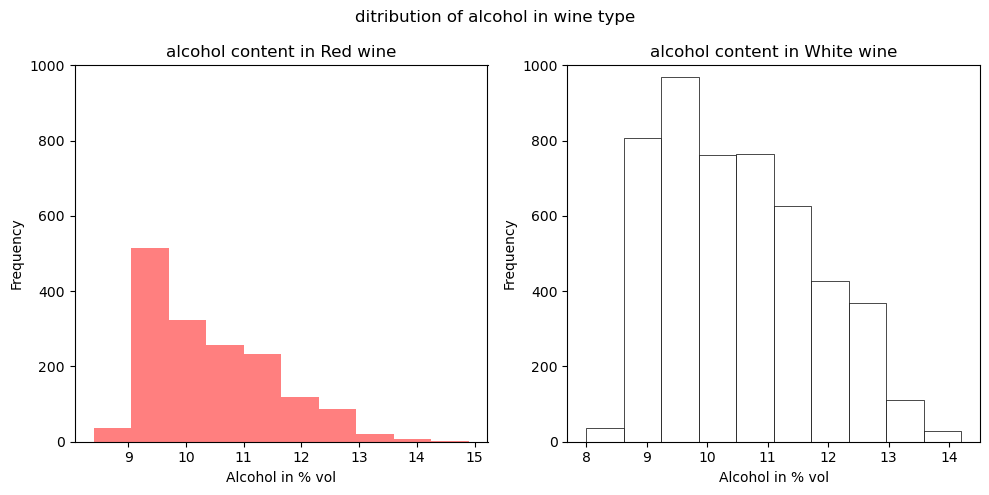

In [7]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
ax[0].hist(wines[wines["type"]==1].alcohol,bins=10,facecolor="red",alpha=0.5,label="Red Wine")
ax[1].hist(wines[wines["type"]==0].alcohol,bins=10,facecolor="white",edgecolor="black",lw=0.5,label="White Wine")
for a in ax:
    a.set_ylim([0,1000])
    a.set_xlabel("Alcohol in % vol")
    a.set_ylabel("Frequency")
ax[0].set_title("alcohol content in Red wine")
ax[1].set_title("alcohol content in White wine")
fig.suptitle("ditribution of alcohol in wine type")
plt.tight_layout()
plt.show()

In [8]:
X=wines.iloc[:,:-1]
y=wines["type"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.34,random_state=45)
model=Sequential()
model.add(Dense(12,activation="relu",input_dim=12))
model.add(Dense(9,activation="relu"))
model.add(Dense(1,activation="sigmoid"))
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(X_train,y_train,epochs=3,batch_size=1,verbose=1)

C:\Users\Jaydeep\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
4288/4288 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.8412 - loss: 1.1884
Epoch 2/3
4288/4288 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9357 - loss: 0.1858
Epoch 3/3
4288/4288 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9395 - loss: 0.1559


In [27]:
y_pred=model.predict(X_test)
y_pred_labels=(y_pred>=0.5).astype (int)
for prediction in y_pred_labels[:12]:
    wine_type="Red Wine" if prediction==1 else "White wine"
    print(f"prediction:{wine_type}")

70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
prediction:White wine
prediction:White wine
prediction:White wine
prediction:White wine
prediction:White wine
prediction:Red Wine
prediction:Red Wine
prediction:White wine
prediction:Red Wine
prediction:White wine
prediction:White wine
prediction:White wine
